In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
from dataloader import DataLoader
from PIL import Image
from _graphutils import GraphUtils
from _plotutils import PlotUtils
from kernels.wlkernel import WLKernel
from kernels.shortestpathkernel import ShortestPathKernel
from kernels.randomwalkkernel import RandomWalkKernel
from kernels.labelhasher import LabelHasher
from collections import Counter
from scipy.stats import entropy

In [17]:
dl = DataLoader("../eyelink_data")
imgs = dl.get_annotated_images()

In [ ]:

fig, ax = PlotUtils.wrap_subplots(len(imgs), 2)
for i, img in enumerate(imgs):
    img_file = dl.get_image(img)
    aois = dl.get_image_aois(img)
    PlotUtils.plot_aois(aois=aois, title=img, image=img_file, ax=ax[i])

In [ ]:
for i, img in enumerate(imgs):
    img_file = dl.get_image(img)
    aois = dl.get_image_aois(img)
    PlotUtils.plot_aois(aois=aois, title=img, image=img_file, ax=ax[i])

In [ ]:
from collections import Counter


for i, img in enumerate(imgs):
    img_file = dl.get_image(img)
    ratings = dl.get_image_ratings(img)
    counts = Counter(ratings.values())

    all_ratings = PlotUtils.answer_colors.keys()
    colors = [PlotUtils.answer_colors[rating] for rating in all_ratings]

    fig, axs = PlotUtils.wrap_subplots(2, 2)
    axs[0].imshow(img_file)
    axs[0].set(title=img)
    axs[1].bar(x=all_ratings, height=[counts.get(rating, 0) for rating in all_ratings], color=colors)
    axs[1].set(xlabel="Subject rating [-]", ylabel="Frequency of ratings [-]")

In [ ]:
fig, ax = plt.subplots(1, 1)
aois = dl.divide_image_aois(imgs[1])
PlotUtils.plot_aois(aois, ax=ax)
PlotUtils.divide_aoi_plot(dl.get_image(imgs[1]), ax=ax)

In [ ]:
fig, axs = PlotUtils.wrap_subplots(6, 2)

imgs = dl.get_example_images()
for i, img in enumerate(imgs):
    divie_aois = dl.divide_image_aois(img)
    manual_aois = dl.get_image_aois(img)
    PlotUtils.plot_aois(aois=manual_aois, title=img, image=dl.get_image(img), ax=axs[i*2])
    PlotUtils.plot_aois(aois=divie_aois, ax=axs[2*i+1], title=img)
    PlotUtils.divide_aoi_plot(dl.get_image(img), ax=axs[2*i+1])    

2.807354922057605 



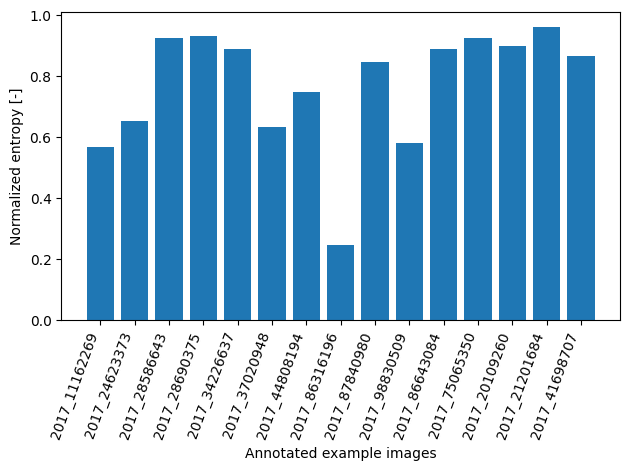

In [ ]:
MAX_ENTROPY = entropy(np.ones(shape=(7)) / 7, base=2)
entropies = []

imgs = dl.get_annotated_images()
for img in imgs:
    ratings = dl.get_image_ratings(img)
    rating_counts = Counter(ratings.values())
    r = [rating_counts.get(c, 0) for c in range(1, 8)]
    answers_frequency = np.array(r) / sum(r)
    entropies.append(entropy(answers_frequency, base=2) / MAX_ENTROPY)

fig, ax = plt.subplots(1,1)
ax.bar(imgs, entropies)
ax.set(xlabel="Annotated example images", ylabel="Normalized entropy [-]")
ax.set_xticks(range(len(imgs)))           
ax.set_xticklabels([img[0:-4] for img in imgs], rotation=70, ha='right')  

plt.tight_layout()  
